In [1]:
import fsspec
import cf_xarray
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem("reference", fo='s3://nextgen-dmac-cloud-ingest/nos/dbofs/nos.dbofs.fields.best.nc.zarr', remote_protocol='s3', remote_options={'anon':True}, target_protocol='s3', target_options={'anon':True})
m = fs.get_mapper("") 

ds = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False), 
                      chunks={})
ds

/Users/matthew.iannucci/Developer/ocean-notebooks/venv/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 15GB
Dimensions:        (tracer: 2, s_rho: 10, s_w: 11, boundary: 4,
                    ocean_time: 762, eta_rho: 732, xi_rho: 119, eta_psi: 731,
                    xi_psi: 118, eta_u: 732, xi_u: 118, eta_v: 731, xi_v: 119)
Coordinates:
    lat_psi        (eta_psi, xi_psi) float64 690kB dask.array<chunksize=(731, 118), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 691kB dask.array<chunksize=(732, 118), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 696kB dask.array<chunksize=(731, 119), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 690kB dask.array<chunksize=(731, 118), meta=np.ndarray>
    lon_rho        (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_u          (eta_u, xi_u) float64 691kB dask.array<chunksize=(732, 118), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 696kB dask.array<chunksize=(731, 119), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 6kB 2024-05-12T01:00:00 ... 20...
  * s_rho          (s_rho) float64 80B -0.95 -0.85 -0.75 ... -0.25 -0.15 -0.05
  * s_w            (s_w) float64 88B -1.0 -0.9 -0.8 -0.7 ... -0.3 -0.2 -0.1 0.0
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/79)
    Akk_bak        float64 8B ...
    Akp_bak        float64 8B ...
    Akt_bak        (tracer) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    Akv_bak        float64 8B ...
    Cs_r           (s_rho) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    Cs_w           (s_w) float64 88B dask.array<chunksize=(11,), meta=np.ndarray>
    ...             ...
    theta_s        float64 8B ...
    u              (ocean_time, s_rho, eta_u, xi_u) float32 3GB dask.array<chunksize=(1, 10, 732, 118), meta=np.ndarray>
    v              (ocean_time, s_rho, eta_v, xi_v) float32 3GB dask.array<chunksize=(1, 10, 731, 119), meta=np.ndarray>
    w              (ocean_time, s_w, eta_rho, xi_rho) float32 3GB dask.array<chunksize=(1, 6, 732, 119), meta=np.ndarray>
    xl             float64 8B ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 266MB dask.array<chunksize=(1, 732, 119), meta=np.ndarray>
Attributes: (12/33)
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AN...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_ra...
    bry_file_01:       nos.dbofs.obc.20240512.t00z.nc
    ...                ...
    svn_url:           
    tide_file:         nos.dbofs.roms.tides.nc
    tiling:            008x016
    title:             dbofs forecast RUN in operational mode
    type:              ROMS/TOMS history file
    var_info:          varinfo.yaml

As illustrated below, the free-surface (zeta), density (rho), and active/passive tracers (t) are located at the center of the cell whereas the horizontal velocity (u and v) are located at the west/east and south/north edges of the cell, respectively. That is, the density is evaluated between points where the currents are evaluated.

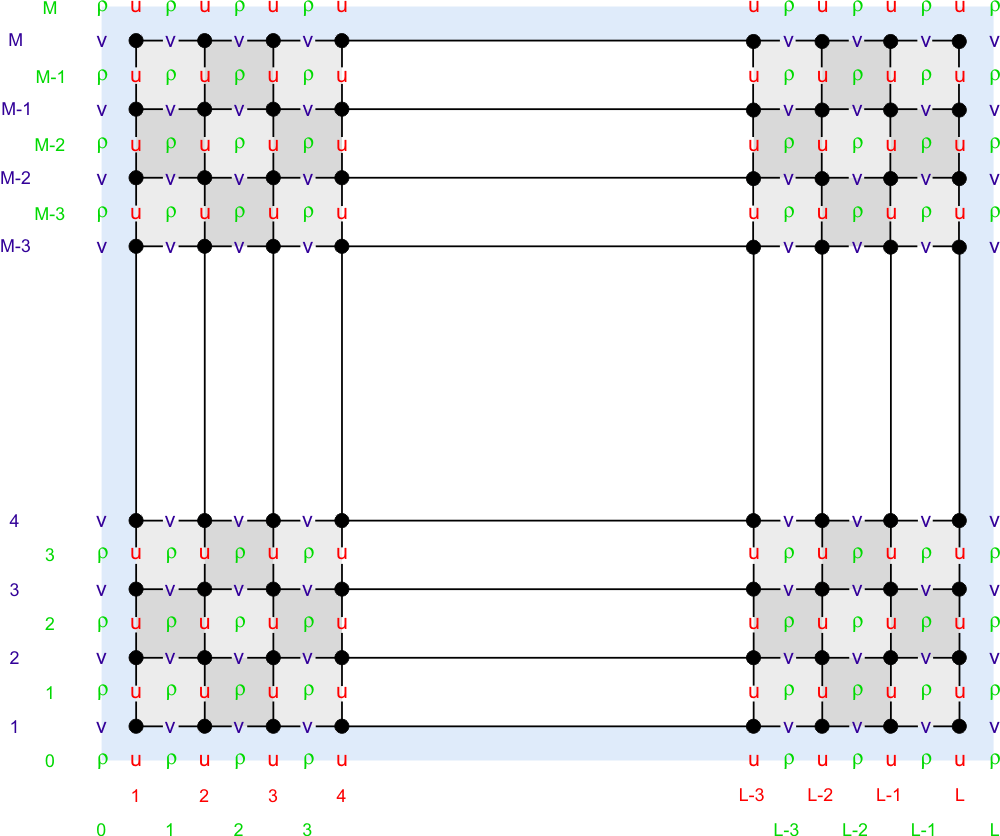

```cs
var uVal = uValues.GetFloatAt(0, i, j);
var vVal = vValues.GetFloatAt(0, i, j);
 
// If the missing value we have nothing else to do
if ((uVal == wms.SLI.MissingValue) || (vVal == wms.SLI.MissingValue) || maskRhos.GetFloatAt(i, j) <= 0)
{
	uVal = MissingValue;
	vVal = MissingValue;
}
else
{
 
	double u2 = uValues.GetFloatAt(0, i, j - 1);
	double v2 = vValues.GetFloatAt(0, i - 1, j);
 
	if (!(u2 == wms.SLI.MissingValue || v2 == wms.SLI.MissingValue || maskRhos.GetFloatAt(i - 1, j) <= 0 || maskRhos.GetFloatAt(i, j - 1) <= 0))
	{
		var u0 = (uVal + u2)/2;
		var v0 = (vVal + v2)/2;
 
		var cosa = Math.Cos(angles.GetFloatAt(i, j));
		var sina = Math.Sin(angles.GetFloatAt(i, j));
 
		var ur = (float) (u0*cosa - v0*sina);
		var vr = (float) (u0*sina + v0*cosa);
```

https://www.myroms.org/wiki/Numerical_Solution_Technique

```matlab
Urho(i,j) = 0.5 * ( U(i,j) + U(i+1,j) )
Vrho(i,j) = 0.5 * ( V(i,j) + V(i,j+1) )

u(LON,LAT)=u(XI,ETA)*cos(angle(i,j))-v(XI,ETA)*sin(angle(i,j))
v(LON,LAT)=v(XI,ETA)*cos(angle(i,j))+u(XI,ETA)*sin(angle(i,j))
```

In [49]:
angle = ds.angle

In [58]:
u = ds.u.isel(ocean_time=0, s_rho=0)

u_rho = angle
u_rho.name = 'u_rho'
u_rho.attrs['field'] = u.attrs['field']
u_rho.attrs['units'] = u.attrs['units']
u_rho.attrs['standard_name'] = u.attrs['standard_name']
u_rho.attrs['long_name'] = u.attrs['long_name']

u_renamed = u.rename({
    'xi_u': 'xi_rho',
    'eta_u': 'eta_rho'
})

u_rho[:, 1:-1] = 0.5 * (u_renamed[:, :-1] + u_renamed[:, 1:])
u_rho[:, 0] = u_renamed[:, 0]
u_rho[:, -1] = u_renamed[:, -1]

u_rho

<xarray.DataArray 'u_rho' (eta_rho: 732, xi_rho: 119)> Size: 697kB
dask.array<setitem, shape=(732, 119), dtype=float64, chunksize=(732, 119), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    field:          u-velocity
    grid:           grid
    location:       face
    long_name:      u-momentum component
    standard_name:  sea_water_x_velocity
    units:          meter second-1

In [57]:
v = ds.v.isel(ocean_time=0, s_rho=0)

v_rho = angle
v_rho.name = 'v_rho'
v_rho.attrs['field'] = v.attrs['field']
v_rho.attrs['units'] = v.attrs['units']
v_rho.attrs['standard_name'] = v.attrs['standard_name']
v_rho.attrs['long_name'] = v.attrs['long_name']

v_renamed = v.rename({
    'xi_v': 'xi_rho',
    'eta_v': 'eta_rho'
})

v_rho[1:-1, :] = 0.5 * (v_renamed[:-1, :] + v_renamed[1:, :])
v_rho[0, :] = v_renamed[0, :]
v_rho[-1, :] = v_renamed[-1, :]


v_rho

<xarray.DataArray 'v_rho' (eta_rho: 732, xi_rho: 119)> Size: 697kB
dask.array<setitem, shape=(732, 119), dtype=float64, chunksize=(732, 119), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    field:          v-velocity
    grid:           grid
    location:       face
    long_name:      v-momentum component
    standard_name:  sea_water_y_velocity
    units:          meter second-1

In [60]:
u_roms = u_rho * np.cos(angle) - v_rho * np.sin(angle)
u_roms = u_roms.assign_attrs(u_rho.attrs)
u_roms.name = 'u_roms'
u_roms.attrs['long_name'] = 'u velocity from from ROMS grid'
u_roms

<xarray.DataArray 'u_roms' (eta_rho: 732, xi_rho: 119)> Size: 697kB
dask.array<sub, shape=(732, 119), dtype=float64, chunksize=(732, 119), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    field:          u-velocity
    grid:           grid
    location:       face
    long_name:      u velocity rotated to ROMS grid
    standard_name:  sea_water_x_velocity
    units:          meter second-1

In [61]:
v_roms = v_rho * np.cos(angle) + u_rho * np.sin(angle)
v_roms = v_roms.assign_attrs(v_rho.attrs)
v_roms.name = 'v_roms'
v_roms.attrs['long_name'] = 'v velocity rotated from ROMS grid'
v_roms

<xarray.DataArray 'v_roms' (eta_rho: 732, xi_rho: 119)> Size: 697kB
dask.array<add, shape=(732, 119), dtype=float64, chunksize=(732, 119), chunktype=numpy.ndarray>
Coordinates:
    lat_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
    lon_rho  (eta_rho, xi_rho) float64 697kB dask.array<chunksize=(732, 119), meta=np.ndarray>
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    field:          u-velocity
    grid:           grid
    location:       face
    long_name:      v velocity rotated to ROMS grid
    standard_name:  sea_water_x_velocity
    units:          meter second-1